In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [67]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [69]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [71]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [73]:
df.info() #no nan value....

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [75]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

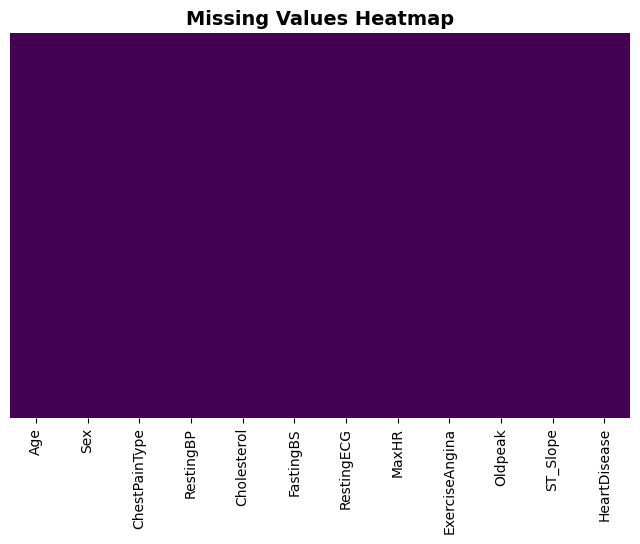

In [77]:
# Create a heatmap to show missing values
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

# Add title
plt.title("Missing Values Heatmap", fontsize=14, fontweight="bold")

# Show the plot
plt.show()

In [78]:
df.shape

(918, 12)

In [80]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [83]:
# Display the updated DataFrame
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [85]:
# Loop through categorical features and print unique values
for col in categorical_cols:  # Use categorical_cols detected earlier
    print(f"Feature: {col}")
    print(df[col].unique())
    print("-" * 40)  # Separator for better readability

Feature: Sex
[1 0]
----------------------------------------
Feature: ChestPainType
[1 2 0 3]
----------------------------------------
Feature: RestingECG
[1 2 0]
----------------------------------------
Feature: ExerciseAngina
[0 1]
----------------------------------------
Feature: ST_Slope
[2 1 0]
----------------------------------------


In [87]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [89]:
# now we will handle the outliars..................................

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns  

# Function to detect & handle outliers using IQR
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)  # First quartile
        Q3 = df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the median using a lambda function
        median = df[col].median()
        df[col] = df[col].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)
    
    return df

# Apply the function to handle outliers
df = handle_outliers(df, numerical_cols)

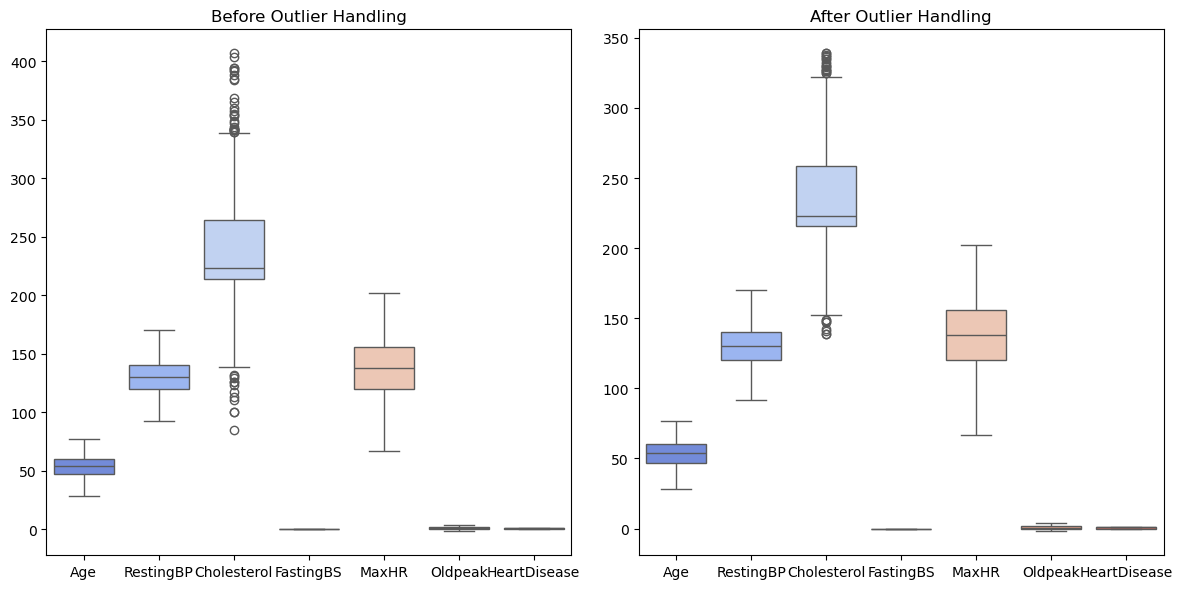

In [91]:
# Plot boxplots for all numerical features before & after outlier handling
plt.figure(figsize=(12, 6))

# Before Handling Outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numerical_cols], palette="coolwarm")
plt.title("Before Outlier Handling")

# After Handling Outliers
df_cleaned = handle_outliers(df.copy(), numerical_cols)  # Apply handling again for visualization
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned[numerical_cols], palette="coolwarm")
plt.title("After Outlier Handling")

plt.tight_layout()
plt.show()

In [92]:
for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Check if any outliers remain
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    
    if not outliers.empty:
        print(f"⚠️ Outliers still present in {col}: {outliers.shape[0]} values")
    else:
        print(f"✅ No more outliers in {col}")

✅ No more outliers in Age
✅ No more outliers in RestingBP
⚠️ Outliers still present in Cholesterol: 26 values
✅ No more outliers in FastingBS
✅ No more outliers in MaxHR
✅ No more outliers in Oldpeak
✅ No more outliers in HeartDisease


In [93]:
#scaling the data

In [94]:
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [95]:
df[numerical_cols].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0.244898,0.615385,0.633540,0.0,0.777778,0.350877,0.0
1,0.428571,0.871795,0.295031,0.0,0.659259,0.526316,1.0
2,0.183673,0.487179,0.614907,0.0,0.229630,0.350877,0.0
3,0.408163,0.589744,0.400621,0.0,0.303704,0.614035,1.0
4,0.530612,0.743590,0.341615,0.0,0.407407,0.350877,0.0


In [101]:
df[numerical_cols].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.0,918.000000,918.000000,918.000000
mean,0.520630,0.501019,0.473423,0.0,0.518341,0.496388,0.553377
std,0.192502,0.199964,0.143913,0.0,0.186783,0.168072,0.497414
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.387755,0.358974,0.400621,0.0,0.392593,0.350877,0.000000
50%,0.530612,0.487179,0.428571,0.0,0.525926,0.456140,1.000000
75%,0.653061,0.615385,0.555901,0.0,0.659259,0.614035,1.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [103]:
# now towards traing and testing..............
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [105]:
# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [107]:
# Initialize KNN model with k=5 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [109]:
y_pred = knn.predict(X_test)

Model Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.73      0.75        77
         1.0       0.81      0.85      0.83       107

    accuracy                           0.80       184
   macro avg       0.80      0.79      0.79       184
weighted avg       0.80      0.80      0.80       184



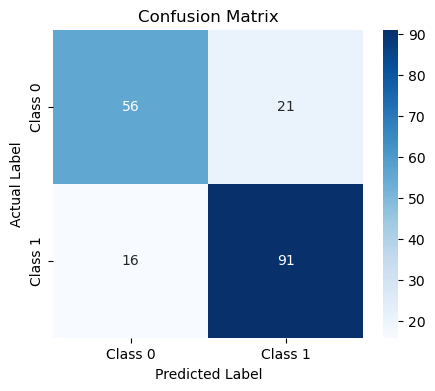

In [111]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [130]:
# try different k values and compare accuracy
k_values = list(range(1, 16, 2))  # Testing odd values from 1 to 15
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)
    print(f"k={k}, Accuracy: {acc:.2f}")

# get the best k
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best k Value: {best_k}, Highest Accuracy: {max(accuracies):.2f}")

k=1, Accuracy: 0.77
k=3, Accuracy: 0.79
k=5, Accuracy: 0.80
k=7, Accuracy: 0.82
k=9, Accuracy: 0.82
k=11, Accuracy: 0.82
k=13, Accuracy: 0.81
k=15, Accuracy: 0.80
Best k Value: 9, Highest Accuracy: 0.82


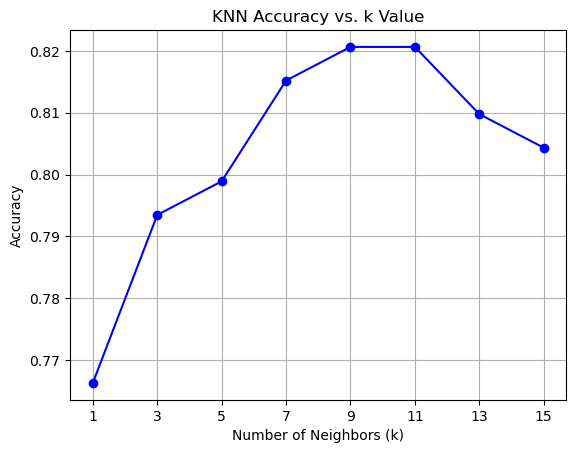

In [126]:
# Plot Accuracy vs. k values
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. k Value")
plt.xticks(k_values)
plt.grid(True)
plt.show()